## Kütüphanelerin import edilmesi


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dosyaları Listeleme

In [55]:
import os
for dirname, _, filenames in os.walk('/content/1000_ml_jobs_us.csv'):
  for filename in filenames:
        print(os.path.join(dirname, filename))

## CSV Dosyasını Okuma

In [56]:
df=pd.read_csv('/content/1000_ml_jobs_us.csv')
df.head(3)

,Unnamed: 0,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
0,0,2024-10-31,Indianapolis,Indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Internship - Machine Learning Engineer & Data ...
1,1,2025-03-14,San Francisco,California,Ikigai,https://www.ikigailabs.io,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer
2,2,2025-04-09,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer




##Data Framedeki geçen iş unvanları







In [57]:
df['job_title'].value_counts()


,count
job_title,
Machine Learning Engineer,243
Data Scientist,53
"Software Engineer, Machine Learning",30
Senior Machine Learning Engineer,22
"Software Engineer, Machine Learning (Multiple Levels) - Slack",9
...,...
Data Scientist I (Remote),1
"Machine Learning Engineer Internship, Gradio - US Remote",1
Machine Learning / AI Engineer,1


## Veri kümesinin genel bilgileri


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 996
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                996 non-null    int64         
 1   job_posted_date           996 non-null    datetime64[ns]
 2   company_address_locality  949 non-null    object        
 3   company_address_region    883 non-null    object        
 4   company_name              996 non-null    object        
 5   company_website           982 non-null    object        
 6   company_description       984 non-null    object        
 7   job_description_text      996 non-null    object        
 8   seniority_level           988 non-null    object        
 9   job_title                 996 non-null    object        
 10  month                     996 non-null    period[M]     
dtypes: datetime64[ns](1), int64(1), object(8), period[M](1)
memory usage: 93.4+ KB


##Tarih sütununun düzenlenmesi ve eksik verilerin temizlenmesi


In [59]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df=df.dropna(subset=['job_description_text'])

##TF-IDF Vektörleştirme

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=5)
x=vectorizer.fit_transform( df['job_description_text'])

 ## K-Means ile kümeleme (clustering)

In [29]:
from sklearn.cluster import KMeans

model =KMeans(n_clusters =5 , random_state =42)
model.fit_predict(x)
df['clusters'] =model.labels_

<ipython-input-29-0c0ec5f3702a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] =model.labels_


 ## Her kümenin en anlamlı kelimelerini listeleme

In [33]:
terms = vectorizer.get_feature_names_out()
top_keywords ={}
for i in range(5):
 center = model.cluster_centers_[i]
 top_terms = [terms[ind] for ind in center.argsort()[-10:][::-1]]
 top_keywords[f"Cluster {i}"] = top_terms
for cluster, keywords in top_keywords.items():
    print(f"{cluster}: {', '.join(keywords)}")

Cluster 0: data, learning, machine, analytics, business, science, models, team, analysis, solutions
Cluster 1: adobe, amazon, ai, geographic, salesforce, job, hiring, compensation, generative, position
Cluster 2: meta, connect, screens, people, learning, machine, help, connection, evolution, rate
Cluster 3: ai, ml, learning, machine, data, models, team, engineering, model, product
Cluster 4: tiktok, creativity, inspire, joy, angeles, los, search, paid, information, ads


## En çok talep edilen iş unvanlarını görselleştirme

Text(0.5, 0, 'Count')

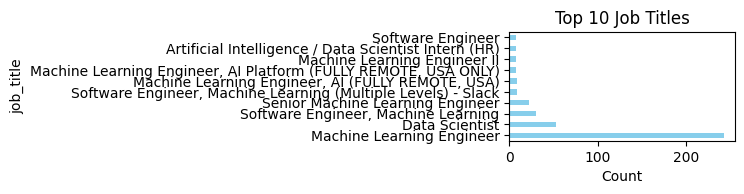

In [34]:
plt.subplot(3, 2, 1)
df['job_title'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Job Titles")
plt.xlabel("Count")

Text(0.5, 0, 'Count')

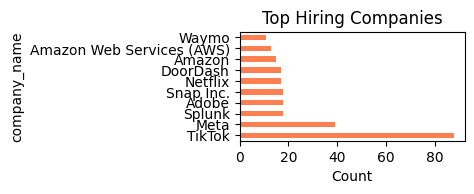

In [35]:
plt.subplot(3, 2, 2)
df['company_name'].value_counts().head(10).plot(kind='barh', color='coral')
plt.title("Top Hiring Companies")
plt.xlabel("Count")

Text(0.5, 0, 'Count')

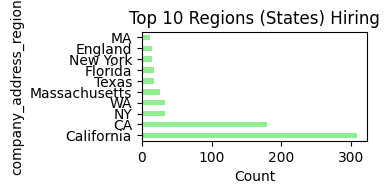

In [38]:
plt.subplot(3, 2, 3)
df['company_address_region'].value_counts().head(10).plot(kind='barh', color='lightgreen')
plt.title("Top 10 Regions (States) Hiring")
plt.xlabel("Count")

Text(0, 0.5, 'Count')

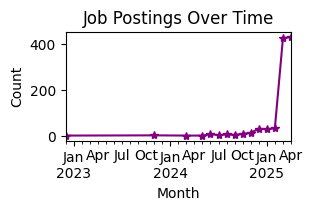

In [62]:
plt.subplot(3, 2, 4)
df['month'] = df['job_posted_date'].dt.to_period('M')  # 'job_posted_date' sütunundaki tarihi 'ay' formatına çevirip yeni bir sütun oluştur
df['month'].value_counts().sort_index().plot(marker='*', color='purple')  # Aylara göre iş ilanlarını zaman sıralı şekilde göster (noktalarla)
plt.title("Job Postings Over Time")  # Başlık
plt.xlabel("Month")  # Ay ekseni
plt.ylabel("Count")  # Y ekseni: ilan sayısı

Text(0, 0.5, 'Count')

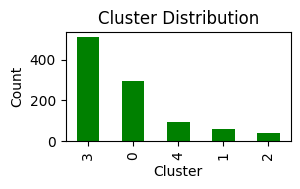

In [40]:
plt.subplot(3, 2, 5)
df['clusters'].value_counts().plot(kind='bar', color='green')
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")

Text(0, 0.5, 'Number of Jobs')

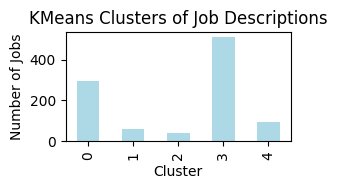

In [50]:
plt.subplot(3, 2, 6)
df['clusters'].value_counts().sort_index().plot(kind='bar', color='lightblue')
plt.title("KMeans Clusters of Job Descriptions")
plt.xlabel("Cluster")
plt.ylabel("Number of Jobs")
